# Red Wine Machine Learning Model

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter

In [2]:
path = 'Resources/RedWine_dataset.csv'
red_wine_df1 = pd.read_csv(path)
red_wine_df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [3]:
red_wine_df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.875547,46.468418,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460434,32.895920,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
red_wine_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   int64  
 6   total sulfur dioxide  1599 non-null   int64  
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 150.0 KB


In [5]:
# Check for null values
red_wine_df1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Sort quality values
red_wine_df1['quality'].value_counts().sort_values() 

3     10
8     18
4     53
7    199
6    638
5    681
Name: quality, dtype: int64

In [7]:
# Check value counts
for col in red_wine_df1:
    print(red_wine_df1[col].value_counts(ascending=False), '\n')

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64 

0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64 

0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64 

2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64 

0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64 

6     139
5     104
10     79
15     78
12     75
7      71
9      62
16     61
17     60
11     59


In [8]:
# Show rows and columns of original dataset
red_wine_df1.shape

(1599, 12)

In [9]:
# Drop Duplicates
# Show rows and columns of updated dataset
red_wine=red_wine_df1.copy()
#red_wine.drop_duplicates(subset=None,inplace=True)
red_wine.shape

(1599, 12)

In [10]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   int64  
 6   total sulfur dioxide  1599 non-null   int64  
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 150.0 KB


###### No categorical variables found in dataset // All variables are qualitative

## Data Visualization

### Correlation Heatmap

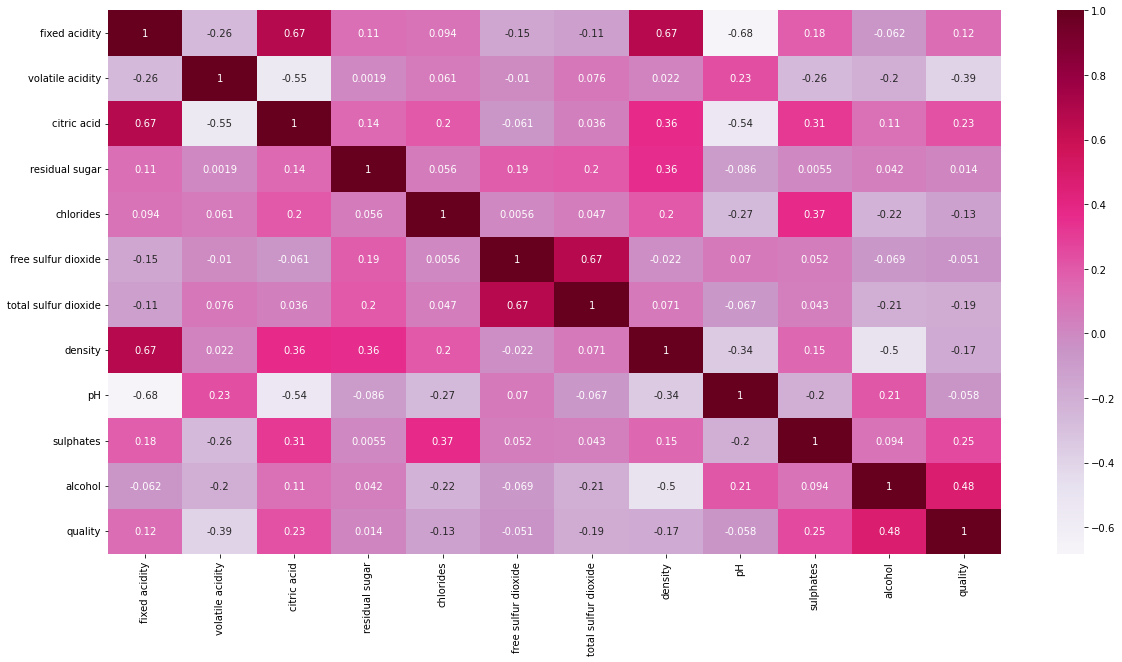

In [11]:
plt.figure(figsize=(20, 10))
sns.heatmap(red_wine.corr(), annot=True,cmap='PuRd')
plt.show()

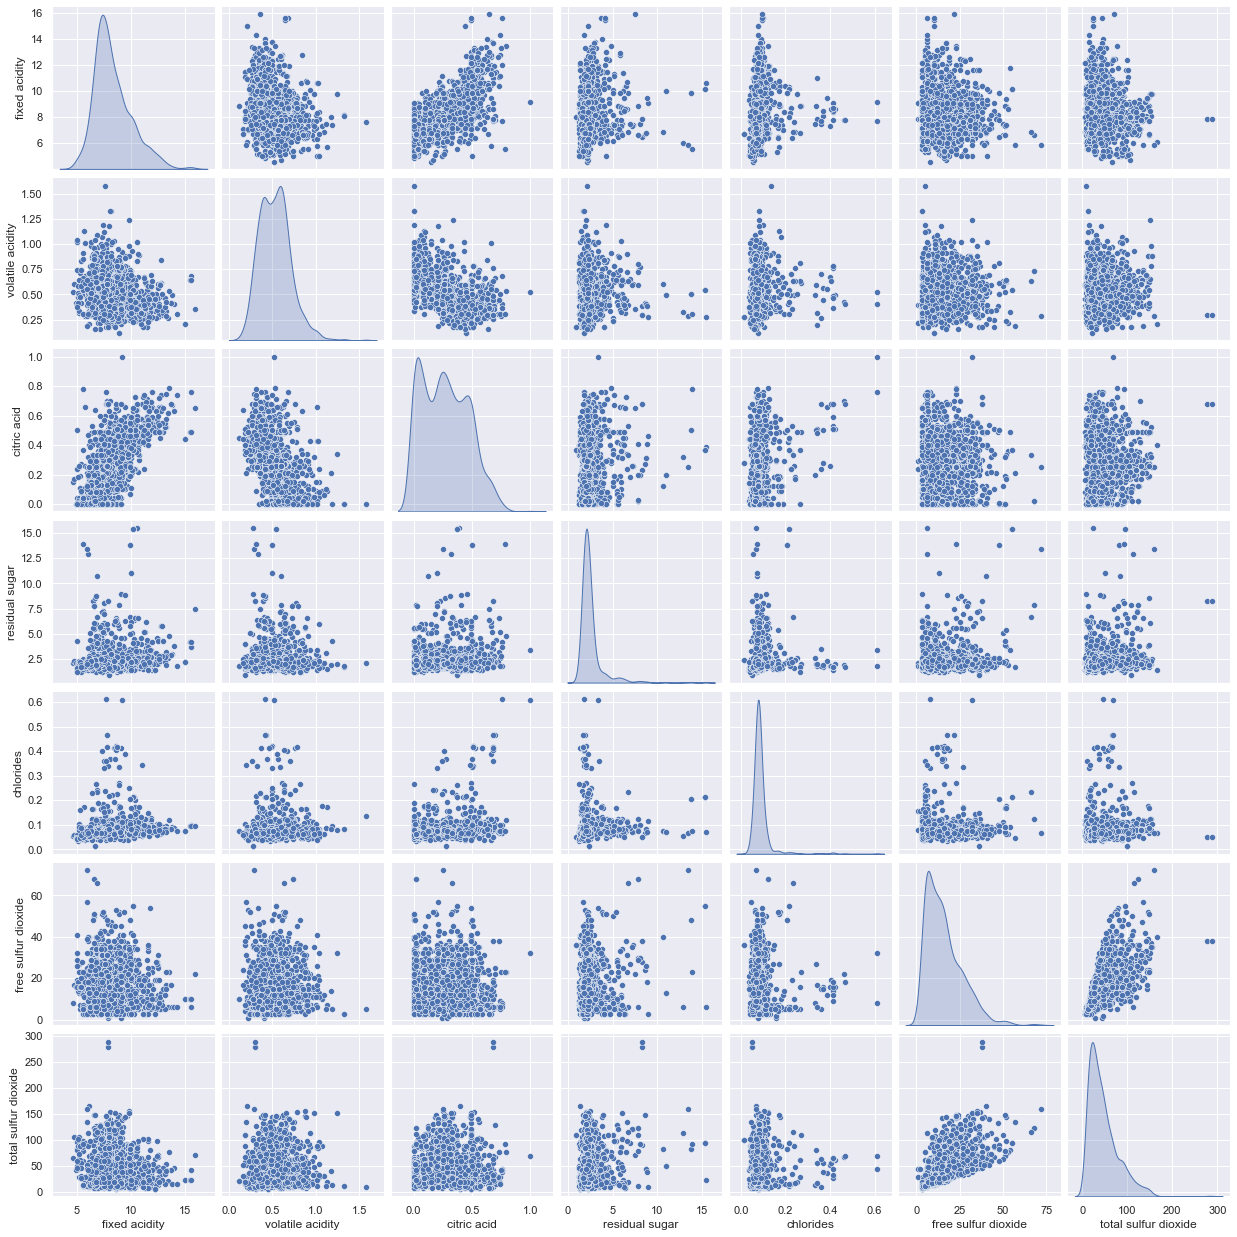

In [12]:
# Multi-Variate Analysis
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = red_wine.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')

No handles with labels found to put in legend.


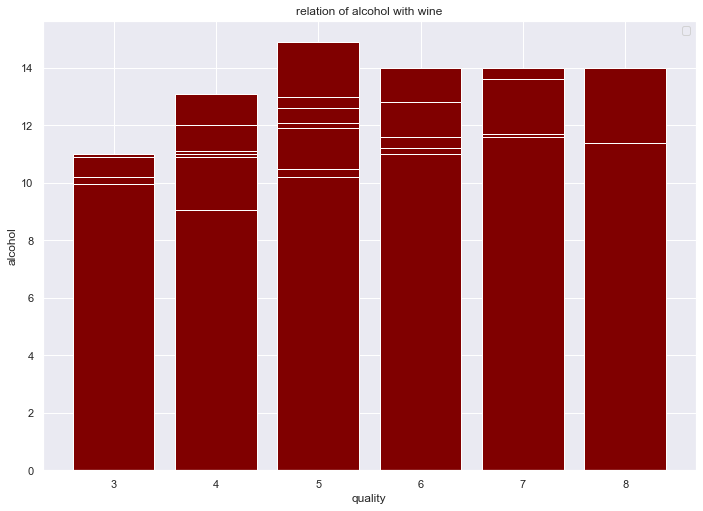

In [13]:
# checking the variation of alcohol in the different qualities of wine

plt.bar(red_wine['quality'], red_wine['alcohol'], color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

After an analysis, we can that there is a high and strong correlation between alcohol and quality. We can also see that there there is a very weak correlation between residual sugar and free sulfur dioxide, so we can ignore those features when creating or model. 

## Split the Data into Training and Testing

In [14]:
#dropping columns
red_wine.drop(['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH'], axis = 1, inplace = True)
red_wine

,volatile acidity,citric acid,sulphates,alcohol,quality
0,0.700,0.00,0.56,9.4,5
1,0.880,0.00,0.68,9.8,5
2,0.760,0.04,0.65,9.8,5
3,0.280,0.56,0.58,9.8,6
4,0.700,0.00,0.56,9.4,5
...,...,...,...,...,...
1594,0.600,0.08,0.58,10.5,5
1595,0.550,0.10,0.76,11.2,6
1596,0.510,0.13,0.75,11.0,6
1597,0.645,0.12,0.71,10.2,5


In [15]:
# Dividing the dataset in training and testing set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

np.random.seed(0)
df_train,df_test=train_test_split(red_wine,train_size=0.7,test_size=0.3,random_state=100)

In [16]:
# Create our features
#X = red_wine[list(red_wine.columns)[:-1]]

# Create our target
#y = red_wine['quality']

X = red_wine.filter(items=['alcohol', 'volatile acidity' ,'sulphates', 'citric acid'])
y = red_wine['quality']

In [17]:
X.describe()

,alcohol,volatile acidity,sulphates,citric acid
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,10.422983,0.527821,0.658149,0.270976
std,1.065668,0.179060,0.169507,0.194801
min,8.400000,0.120000,0.330000,0.000000
25%,9.500000,0.390000,0.550000,0.090000
50%,10.200000,0.520000,0.620000,0.260000
75%,11.100000,0.640000,0.730000,0.420000
max,14.900000,1.580000,2.000000,1.000000


In [18]:
y.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [19]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [20]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [21]:
# Training model info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1119 entries, 858 to 1544
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   volatile acidity  1119 non-null   float64
 1   citric acid       1119 non-null   float64
 2   sulphates         1119 non-null   float64
 3   alcohol           1119 non-null   float64
 4   quality           1119 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 52.5 KB


In [22]:
# Testing model info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1254 to 4
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   volatile acidity  480 non-null    float64
 1   citric acid       480 non-null    float64
 2   sulphates         480 non-null    float64
 3   alcohol           480 non-null    float64
 4   quality           480 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 22.5 KB


In [23]:
df_train.shape

(1119, 5)

In [24]:
df_test.shape

(480, 5)

## Rescaling

In [25]:
from imblearn.over_sampling import SMOTE

#oversampling on minority
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

## Linear Regression

In [26]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [27]:
train_pred = regressor.predict(X_train)
print(train_pred)
test_pred = regressor.predict(X_test) 
print(test_pred)

[5.80710254 4.9852926  5.87849841 ... 5.40297118 5.04868779 6.45167169]
[5.78648485 5.41816413 6.16119808 5.72633428 6.64944191 6.03694317
 6.17702114 5.40349277 5.74558436 5.17268552 6.08212922 5.35674356
 5.69526214 6.36185858 5.56997324 5.41508823 5.7868107  5.36935752
 5.70629219 5.33507039 5.50390996 5.99497766 5.32783419 6.28575673
 5.63268499 6.27475458 5.98091321 5.77867262 5.29683827 6.38474747
 5.11441436 6.27164819 5.2871893  6.18692256 4.89679176 5.72904939
 5.23627645 5.26128956 6.31670347 5.01986808 6.06743389 5.36215652
 5.02469608 6.04461426 5.29567381 5.77150326 5.08287177 5.16179126
 5.24436083 5.88095022 5.73685895 5.36658663 6.02022552 5.04656617
 5.17036904 5.94387083 5.99291904 5.98624309 5.59234893 5.35101638
 6.44830948 5.32408986 5.26751367 5.7243371  4.76640116 5.62985816
 6.53272915 5.7046158  5.55387371 6.40102907 4.89679176 6.45788941
 5.46465027 5.55330303 5.37183721 5.31344039 6.05205583 5.18703805
 5.83753176 5.74461624 5.97065226 5.36418505 5.17304586 5

In [28]:
# calculating Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error

train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
print(train_rmse)
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
print(test_rmse)

0.6678729710575754
0.627436047538862


In [29]:
# rounding off the predicted values for test set
predicted_data = np.round_(test_pred)
print(predicted_data)

[6. 5. 6. 6. 7. 6. 6. 5. 6. 5. 6. 5. 6. 6. 6. 5. 6. 5. 6. 5. 6. 6. 5. 6.
 6. 6. 6. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 5. 6. 5. 6. 5. 5. 6. 5. 6. 5. 5.
 5. 6. 6. 5. 6. 5. 5. 6. 6. 6. 6. 5. 6. 5. 5. 6. 5. 6. 7. 6. 6. 6. 5. 6.
 5. 6. 5. 5. 6. 5. 6. 6. 6. 5. 5. 5. 6. 5. 5. 6. 5. 6. 5. 6. 5. 6. 6. 5.
 6. 5. 5. 6. 5. 5. 5. 5. 5. 5. 6. 5. 6. 6. 7. 5. 6. 5. 5. 7. 5. 5. 5. 5.
 5. 6. 6. 5. 5. 6. 6. 5. 6. 6. 6. 5. 6. 5. 6. 6. 5. 6. 5. 6. 5. 5. 6. 5.
 6. 6. 6. 5. 6. 6. 5. 7. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 5. 5. 6. 6. 6. 5.
 5. 6. 5. 6. 5. 5. 6. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 7. 6. 6. 5. 5. 5. 6.
 6. 6. 6. 5. 6. 6. 6. 5. 6. 6. 6. 5. 6. 6. 5. 5. 6. 6. 6. 6. 5. 6. 5. 5.
 5. 5. 6. 6. 6. 5. 5. 5. 6. 6. 5. 6. 6. 6. 5. 5. 6. 6. 6. 5. 6. 5. 6. 5.
 6. 6. 6. 5. 6. 7. 6. 5. 5. 5. 5. 5. 7. 6. 6. 5. 6. 5. 6. 6. 6. 5. 6. 5.
 6. 6. 6. 5. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 5. 5. 7. 6. 6. 5. 5. 6. 5. 6.
 5. 6. 6. 6. 6. 5. 6. 6. 5. 6. 5. 6. 6. 6. 5. 6. 6. 5. 5. 6. 6. 5. 5. 6.
 5. 6. 5. 6. 5. 5. 6. 6. 5. 5. 7. 5. 5. 5. 5. 7. 6.

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 0.4958638799424328
Mean Squared Error: 0.39367599375118906
Root Mean Squared Error: 0.627436047538862


In [31]:
regressor.score(X_test, y_test)

0.3315913345198198

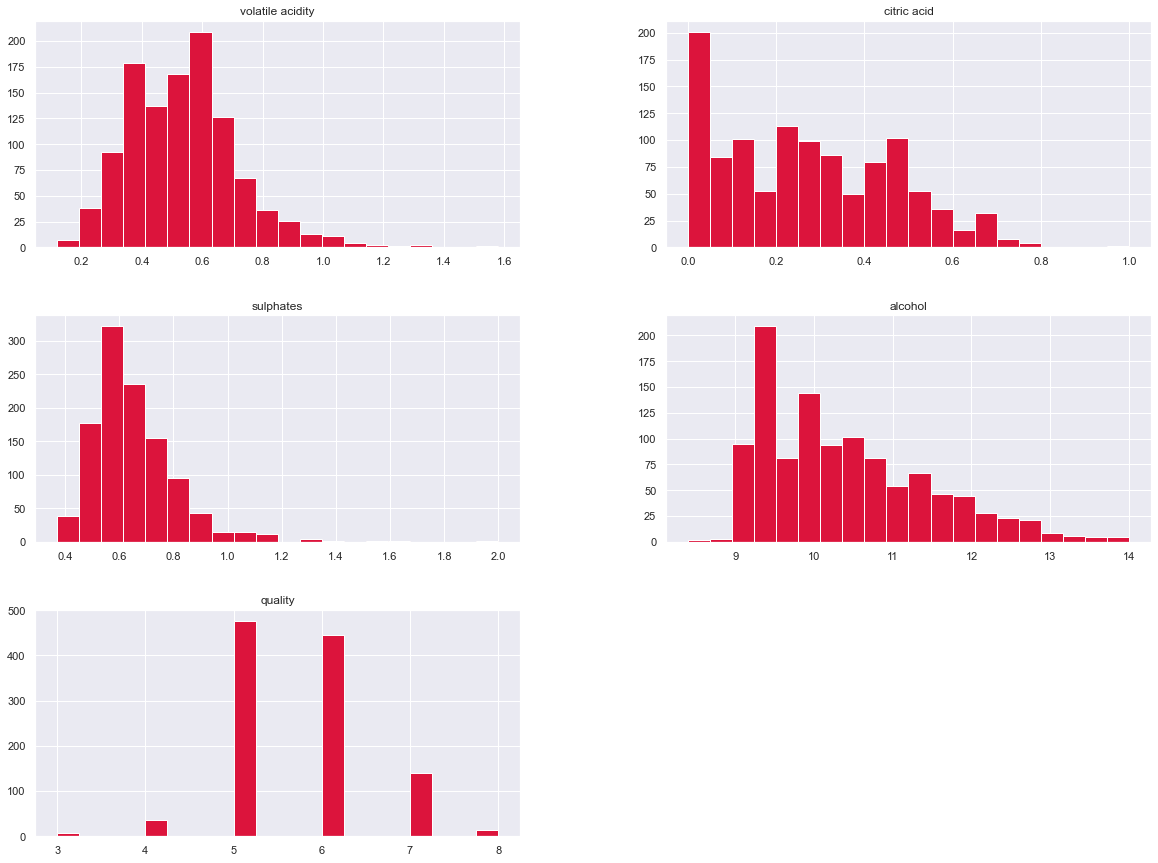

In [32]:
# Distributions of the variables / features
df_train.hist(figsize=(20,15),bins=20, color="crimson")
plt.show()

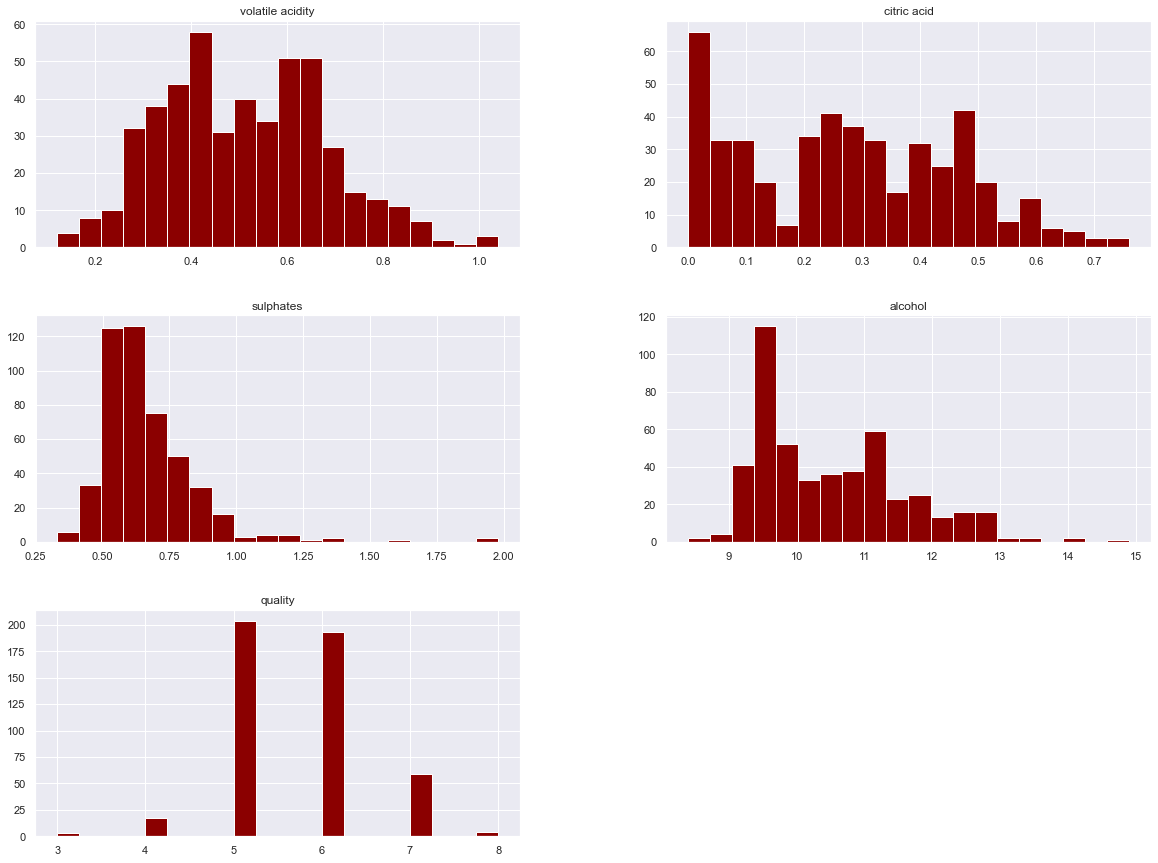

In [33]:
df_test.hist(figsize=(20,15),bins=20, color='darkred')
plt.show()

##### Pearson's Correlation

In [34]:
# Feature selection using Pearson's Correlation

# red wine (alcohol, volatile acid, sulphate, citric acid)
#X = red_wine.filter(items=['alcohol', 'volatile acid' ,'sulphates', 'citric acid'])
#Y = red_wine['quality']
# red wine train_test_split
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X, y, test_size=0.3)
#print("Features chosen for Pearson's Correlation: [alcohol, volatile acid, sulphates, citric acid]")
print("red wine result using Pearon's Correlation: ")
regressor.score(X_red_test, y_red_test)

red wine result using Pearon's Correlation: 


0.425113145206896

## Classification 

Scaling for Quality Value 
- Low: 0 to 4
- Medium: 5 -6
- High: 7 - 10

*Note that the reason I made the Low group a larger range is we don't have many wines below a 5 rating.

In [35]:
# red wine replacement in quality
red_wine.loc[red_wine['quality'] < 5, 'quality'] = 1
red_wine.loc[red_wine['quality'] == 5, 'quality'] = 2
red_wine.loc[red_wine['quality'] == 6, 'quality'] = 2
red_wine.loc[red_wine['quality'] > 6, 'quality'] = 3

### Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
X = red_wine.filter(items=['alcohol', 'sulphates', 'total sulfur dioxide'])
y = red_wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
print(rf_clf)

RandomForestClassifier()


In [38]:
print('Training Accuracy of Random Forest: ', rf_clf.score(X_train, y_train))
print('Test Accuracy of Random Forest: ', rf_clf.score(X_test, y_test))

Training Accuracy of Random Forest:  0.9597855227882037
Test Accuracy of Random Forest:  0.81875
